In [3]:
!pip3 install pystan
!pip3 install Prophet

In [42]:
import pandas as pd

In [13]:
_df=pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv', encoding='shift-jis', skiprows=1)

In [14]:
_df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2017/12/31,19:00,3527
8756,2017/12/31,20:00,3443
8757,2017/12/31,21:00,3335
8758,2017/12/31,22:00,3200


In [17]:
years =[2017,2018,2019]
df = pd.DataFrame()
for year in years:
    _df=pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv', encoding='shift-jis', skiprows=1)
    df = pd.concat([df,_df],axis=0)

In [18]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [20]:
df=df.reset_index(drop=True)

In [27]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'
str_datetime

'2017/1/1 0:00'

In [29]:
from datetime import datetime as dt

In [31]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
datetime

datetime.datetime(2017, 1, 1, 0, 0)

In [34]:
datetimes =[]

for index, datum in df.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [36]:
datetimes[:3]

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0)]

In [37]:
df['ds'] = datetimes

In [38]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [40]:
df = df.rename(columns={'実績(万kW)':'y'})
df.head()

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [56]:
from prophet import Prophet
model = Prophet()

In [57]:
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [59]:
future = model.make_future_dataframe(24*366, freq='H')

In [60]:
future

,ds
0,2017-01-01 00:00:00
1,2017-01-01 01:00:00
2,2017-01-01 02:00:00
3,2017-01-01 03:00:00
4,2017-01-01 04:00:00
...,...
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00


In [61]:
forecast = model.predict(future)

In [62]:
import matplotlib.pyplot as plt

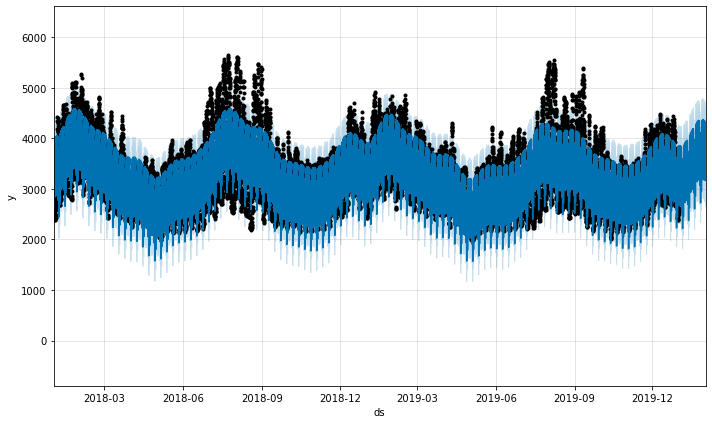

In [85]:
model.plot(forecast)
plt.xlim(dt(2018,1,1), dt(2020,2,1))
plt.show()

In [68]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv', encoding='shift-jis', skiprows=1)

In [69]:
df_2020.head()

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [74]:
forecast_2020 = forecast[forecast['ds'] >= dt(2020,1,1)].reset_index(drop=True)

In [76]:
forecast_2020.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3129.232799,2543.040720,3311.739486,3129.232799,3129.232799,-221.101682,-221.101682,-221.101682,-488.418096,...,108.739137,108.739137,108.739137,158.577277,158.577277,158.577277,0.0,0.0,0.0,2908.131117
1,2020-01-01 01:00:00,3129.187280,2390.415615,3158.190928,3129.187280,3129.187280,-350.791369,-350.791369,-350.791369,-617.310869,...,108.085489,108.085489,108.085489,158.434011,158.434011,158.434011,0.0,0.0,0.0,2778.395911
2,2020-01-01 02:00:00,3129.141761,2318.664001,3094.342345,3129.141761,3129.141761,-428.410077,-428.410077,-428.410077,-694.377052,...,107.670179,107.670179,107.670179,158.296796,158.296796,158.296796,0.0,0.0,0.0,2700.731684
3,2020-01-01 03:00:00,3129.096242,2317.392386,3058.000200,3129.096242,3129.096242,-462.309375,-462.309375,-462.309375,-727.961739,...,107.486715,107.486715,107.486715,158.165649,158.165649,158.165649,0.0,0.0,0.0,2666.786866
4,2020-01-01 04:00:00,3129.050723,2312.101890,3070.561060,3129.050723,3129.050723,-442.578300,-442.578300,-442.578300,-708.143518,...,107.524631,107.524631,107.524631,158.040587,158.040587,158.040587,0.0,0.0,0.0,2686.472423


In [78]:
df_2020 = df_2020.rename(columns={'実績(万kW)':'y'})

In [79]:
df_2020.head()

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [ ]:
#forecast_2020['yhat']

In [80]:
results = pd.DataFrame()

In [81]:
results['t']= df_2020['y']

results['y']= forecast_2020['yhat']
results['diff']=results['t']-results['y']

In [82]:
results.head()

,t,y,diff
0,2857,2908.131117,-51.131117
1,2703,2778.395911,-75.395911
2,2602,2700.731684,-98.731684
3,2520,2666.786866,-146.786866
4,2464,2686.472423,-222.472423


In [83]:
import numpy as np

In [84]:
np.mean(abs((results['y']-results['t'])/results['y'])*100)

12.175079402887496

In [ ]:
model = Prophet()